# Lab : 3 Dhrushil Patel

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn import datasets
diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True)

## Importing The Data

In [3]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
diabetes_X.shape

(442, 10)

In [5]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
diabetes_y.shape

(442,)

## Exploring the data

In [7]:
diabetes = pd.DataFrame(diabetes_X,columns = ["age","sex","bmi","bp","s1 tc","s2 ldl","s3 hdl","s4 tch","s5 ltg","s6 glu"])
diabetes

,age,sex,bmi,bp,s1 tc,s2 ldl,s3 hdl,s4 tch,s5 ltg,s6 glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


## Combining two tables into one

In [8]:
diabetes["dis_prog"] = pd.DataFrame(diabetes_y)
diabetes

,age,sex,bmi,bp,s1 tc,s2 ldl,s3 hdl,s4 tch,s5 ltg,s6 glu,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Correlation Plot using boxplot & heatmap 

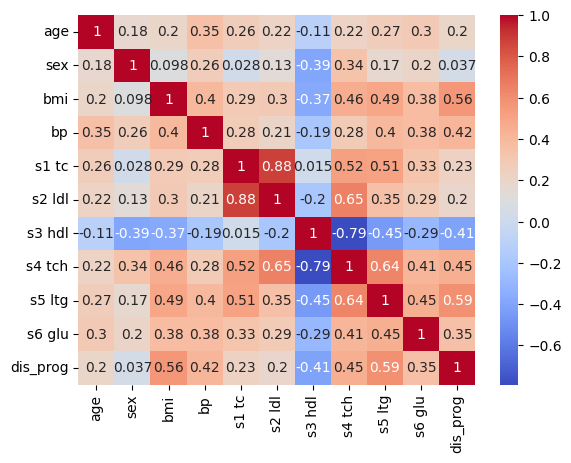

In [9]:
corr_matrix = diabetes.corr(method="spearman")
color_palette = "coolwarm"
sns.heatmap(corr_matrix, annot=True, cmap=color_palette)
plt.show()

## Violin Plot

<Axes: >

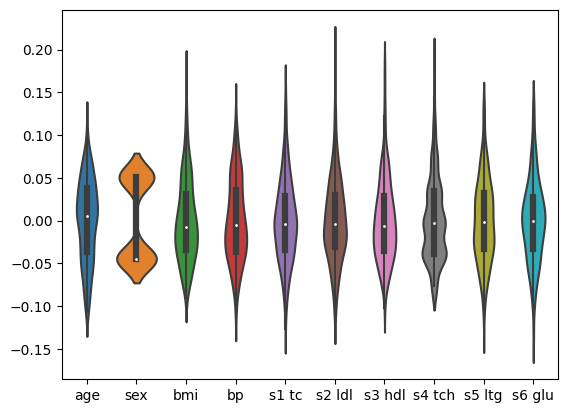

In [17]:
sns.violinplot(diabetes.iloc[:,:-1])

## Scatter Plot BMI vs Disease

Text(0.5, 1.0, 'BMI vs Disease Progression')

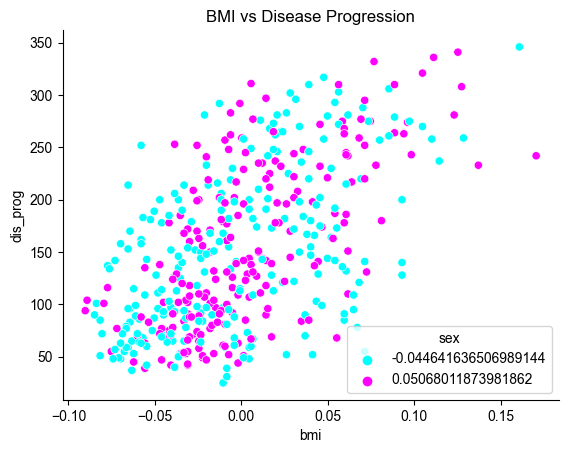

In [27]:
scatter_plot = sns.scatterplot(data=diabetes, x="bmi", y="dis_prog", hue="sex", palette="cool")
sns.set_style("whitegrid")  # Set a specific style for the plot
sns.despine()  # Remove the top and right spines
scatter_plot.set_title("BMI vs Disease Progression")

## Training the data to fit into model

In [33]:
X = diabetes["bmi"].values.reshape(-1, 1)
y = diabetes["dis_prog"].values

In [52]:
test_size = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [53]:
shapes = {
    "train_X": X_train.shape,
    "test_X": X_test.shape,
    "train_y": y_train.shape,
    "test_y": y_test.shape
}

for data, shape in shapes.items():
    print(f"Shape of {data}: {shape}")

Shape of train_X: (353, 1)
Shape of test_X: (89, 1)
Shape of train_y: (353,)
Shape of test_y: (89,)


## Creating Linear Regression model

In [54]:
model = LinearRegression()
model

LinearRegression()

## Get the values of Coefficients & Intercept

In [56]:
m = model.coef_
b = model.intercept_
print("Regression coefficients: ", m)
print("Regression Intercept: ", b)

Regression coefficients:  [914.80793327]
Regression Intercept:  152.4041464339237


In [57]:
y_pred = model.predict(X_test)
y_pred

array([150.6708545 , 135.88098896, 188.13851386, 185.18054075,
       129.96504275, 148.69887243, 254.19991326, 125.03508757,
       168.41869314, 106.30125789, 124.04909653, 146.72689036,
       169.40468418, 183.20855868, 145.74089932, 135.88098896,
       111.23121307, 158.55878279, 170.39067522, 223.63419115,
       137.85297104, 220.67621804, 147.71288139, 101.37130271,
       124.04909653, 180.25058557, 144.75490829, 144.75490829,
       131.93702482, 144.75490829, 136.86698   , 207.85833457,
       188.13851386, 200.95639732, 173.34864832, 131.93702482,
       122.07711446,  81.651482  , 185.18054075, 110.24522203,
       169.40468418,  91.51139235, 115.17517721, 142.78292621,
       115.17517721, 181.23657661,  90.52540132, 114.18918618,
       137.85297104, 202.9283794 ,  88.55341925, 166.44671107,
       237.43806565, 207.85833457, 117.14715928, 154.61481864,
       257.15788636, 157.57279175, 140.81094414, 213.77428079,
       175.32063039, 117.14715928, 248.28396704, 211.80

In [58]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_comp = pd.concat([y_test_df,y_pred_df], axis = 1, join="inner")
y_comp.columns = ["y_test_df", "y_pred_df"]
y_comp

,y_test_df,y_pred_df
0,185.0,150.670855
1,150.0,135.880989
2,246.0,188.138514
3,184.0,185.180541
4,110.0,129.965043
...,...,...
84,258.0,253.213922
85,235.0,163.488738
86,173.0,168.418693
87,59.0,92.497383


## Making the graphs for train and test data

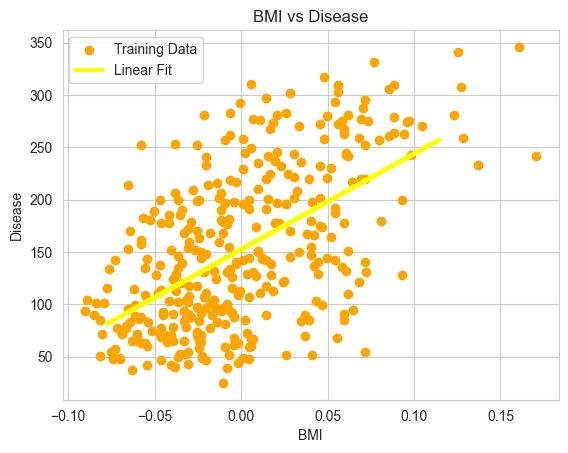

In [60]:
plt.scatter(X_train,y_train, color='orange', label="Training Data")
plt.plot(X_test,y_pred,color= 'yellow', linewidth=3, label="Linear Fit")
plt.title("BMI vs Disease")
plt.xlabel("BMI")
plt.ylabel("Disease")
plt.legend()
plt.show()

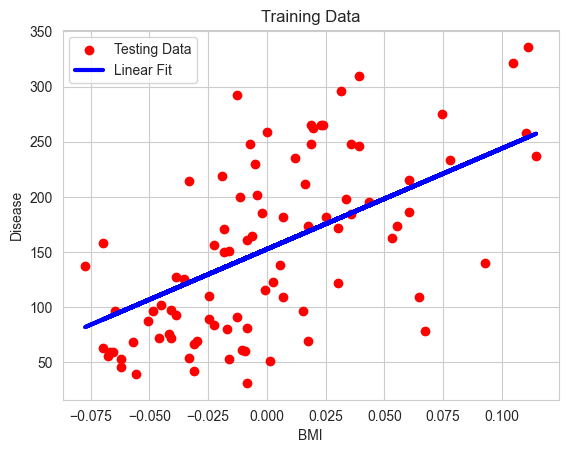

In [62]:
plt.scatter(X_test, y_test, color= 'red', label="Testing Data")
plt.plot(X_test,y_pred,color= 'blue', linewidth=3, label="Linear Fit")
plt.title("Training Data")
plt.xlabel("BMI")
plt.ylabel("Disease")
plt.legend()
plt.show()

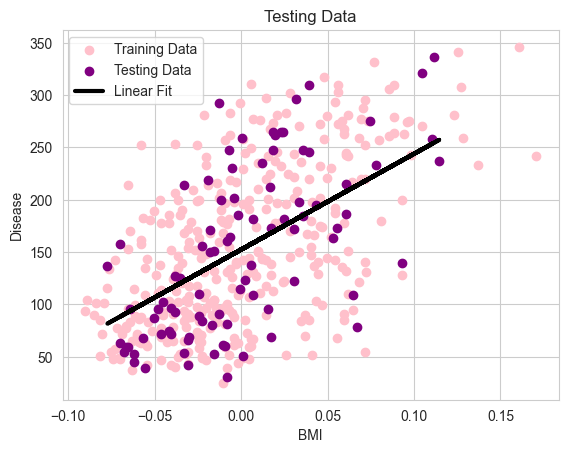

In [70]:
plt.scatter(X_train,y_train, color='pink', label="Training Data")
plt.scatter(X_test, y_test, color= 'purple', label="Testing Data")
plt.plot(X_test,y_pred,color= 'black', linewidth=3, label="Linear Fit")
plt.title("Testing Data")
plt.xlabel("BMI")
plt.ylabel("Disease")
plt.legend()
plt.show()

## Calculate the errors and accuracy of the model

In [80]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % mse)

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:  %.2f" % mae)

# Accuracy of the model
print("R-Squared of the model: %.2f" %model.score(X,y))

Mean Squared Error: 3878.10
Mean Absolute Error:  51.46
R-Squared of the model: 0.34


According to the Mean Square Error and Mean Outright Worth, which are respectively 3878.10 and 51.46, the direct relapse examination reveals a significant discrepancy between the expected and actual attributes. A model that only makes sense of a portion of the information's diversity, according to the R-Squared value of 0.34, is suggested. The analysis includes the crucial effect of BMI on infection movement despite these discrepancies. It is critical to keep in mind that, despite the model's imperfect accuracy, it really provides key insights into the complex relationship between BMI and the progression of the illness.